In [47]:
cd \\kraken\T\freely_moving_ephys\ephys_recordings\111720\BetaFPV\monitorTest\

\\kraken\T\freely_moving_ephys\ephys_recordings\111720\BetaFPV\monitorTest


In [48]:
world_file = '111720_BetaFPV_monitorTest_world.nc'

In [49]:
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [50]:
# load worldcam
world_data = xr.open_dataset(world_file)
world_vid_raw = np.uint8(world_data['WORLD_video'])

#resize worldcam to make more manageable
sz = world_vid_raw.shape
downsamp = 0.5
world_vid = np.zeros((sz[0],np.int(sz[1]*downsamp),np.int(sz[2]*downsamp)), dtype = 'uint8')
for f in range(sz[0]):
    world_vid[f,:,:] = cv2.resize(world_vid_raw[f,:,:],(np.int(sz[2]*downsamp),np.int(sz[1]*downsamp)))

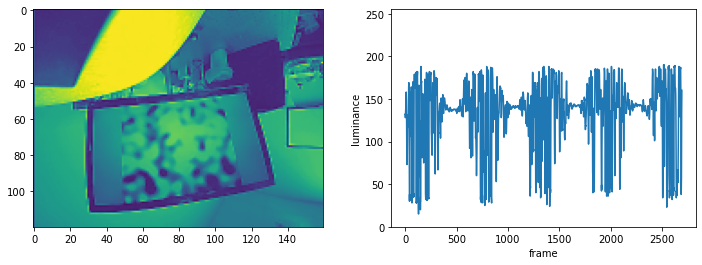

In [52]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.imshow(world_vid[1300,:,:], vmin = 0, vmax = 255)
plt.subplot(1,2,2)
plt.plot(world_vid[:,80,80]); plt.ylim([0,255])
plt.xlabel('frame'); plt.ylabel('luminance')
plt.savefig(world_file[0:-5]+'_screen.pdf')

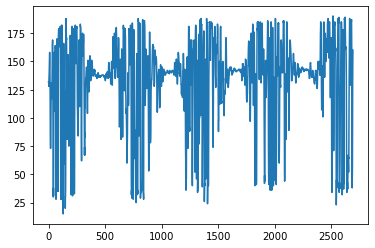

In [23]:
plt.plot(world_vid[:,80,80])
plt.savefig(world_file[0:-5]+'_trace.pdf')